# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Combine data for Weather and Air quality](#3.4.1_Ski_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Draw two dimensional plot for each features](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

So far for this project, I extracted the weather and air quality data. I cleaned those data and combine to a single data frame. The air quality data is the time series data. In this notebook, I will explore more about this data graphically. For this time series data, we will check we can add few more information from time.  

## 3.3 Imports<a id='3.3_Imports'></a>

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Combined Weather and Climate data<a id='3.4.1_Combine_dat'></a>

In the previous notebook for data wrangling, we combined two datasets, weather and air quality data. Here we are going to expolore more about these data with different graphical tools.

In [13]:
# loading data 
data = pd.read_csv('../data/realdata/airquality_climate_combine.csv')

In [14]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1675 non-null   object 
 1   T       1675 non-null   float64
 2   TM      1675 non-null   float64
 3   Tm      1675 non-null   float64
 4   H       1675 non-null   float64
 5   PP      1675 non-null   float64
 6   VV      1675 non-null   float64
 7   V       1675 non-null   float64
 8   VM      1675 non-null   float64
 9   AQI     1675 non-null   float64
dtypes: float64(9), object(1)
memory usage: 131.0+ KB


* Our data has numerical features except `date` which is object type. For this time series analysis, we are going to set `date` as pandas `date-time` object. 

In [15]:
# look at the data- first five points and last five points
data.head(), data.tail()

(         date     T    TM    Tm     H     PP   VV     V    VM    AQI
 0  2017-03-24  17.6  25.0  10.6  72.0   0.00  5.1  10.4  25.9  162.0
 1  2017-03-25  19.2  27.0  10.0  69.0  15.49  5.6   5.6  14.8  156.0
 2  2017-03-26  19.4  27.5  14.6  75.0   0.00  4.8  10.0  24.1  131.0
 3  2017-03-27  20.2  27.0  15.5  73.0   0.00  5.0   8.5  22.2  169.0
 4  2017-03-28  19.9  22.5  16.5  79.0   0.00  4.0   5.6  14.8  162.0,
             date     T    TM   Tm     H     PP   VV    V    VM    AQI
 1670  2021-12-27   9.7  17.0  4.0  76.0   0.00  4.3  5.9  14.8  161.0
 1671  2021-12-28  10.2  15.0  3.6  77.0   0.00  3.2  5.2  13.0  160.0
 1672  2021-12-29   7.3   9.0  6.8  99.0  37.34  4.5  3.7  13.0  185.0
 1673  2021-12-30   8.3  13.5  5.0  90.0   8.38  4.2  3.3   7.6  131.0
 1674  2021-12-31   8.4  15.0  4.0  81.0   0.00  4.2  4.6  13.0  158.0)

* Data are sorted based on `date` columns. 

### 3.4.2 Create DateTime object<a id='3.4.2_Create_Date_Time_Object'></a>

- Pandas Library has function called `to_datetime` which convert data series to datetime object. Here we are converting `date` column using this function. 

In [16]:
# convert date to datetime pandas type
data['date'] = pd.to_datetime(data['date'])

In [17]:
#data.set_index('date',inplace=True)

## 3.5 Explore Features with Graphical Technique<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Histogram from each features<a id='3.5_Histogram_The_Data'></a>

- Here first we are going to see histogram from all the features. The histogram gives us data distribution on each features. 

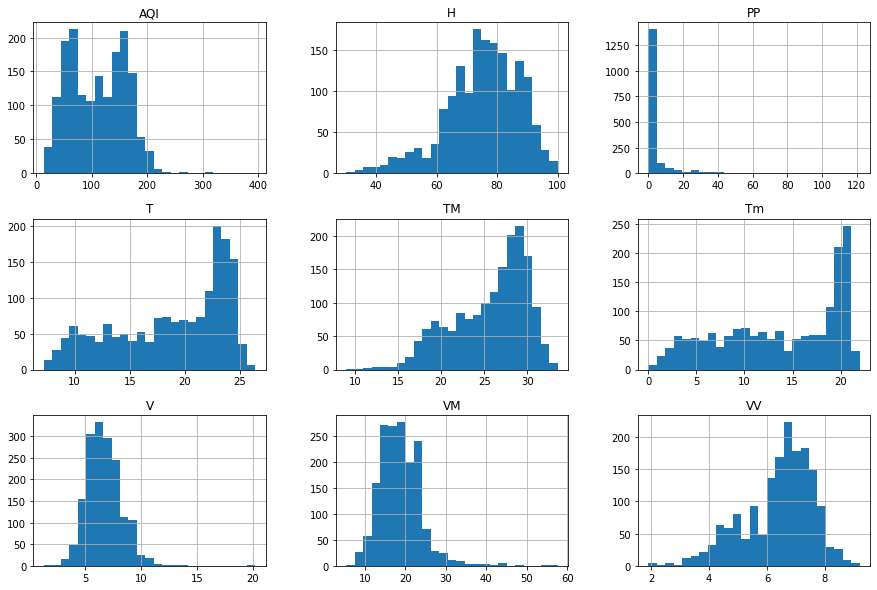

In [27]:
# 1d plot of these features first
data.hist(bins=25,figsize=(15,10))
plt.show();

There are so many information we can draw from these histogram. 
* `AQI` has two prominent peak below 100 and above 100. This can be explore with time to make sense. 
* Second row of above plot has temperature variables, and are showing similar distribution. In addition, the data  contain higher counts for average temperature higher than 20. 
* `PP`  feature is more skewed. Lots of days has no rain falls.

### 3.5.2 Check for Colinearity<a id='3.5_Colinearity_Check'></a>

Colinearity between independent and dependent variable provide information about feature importance in our model. Here we will check those colinearity. 

In [19]:
# make scatter plot with AQI 
# define useful function to create scatterplots of AQI against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AQI', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='AQI value')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [20]:
features = [col for col in data.columns if col not in ['AQI','date']]

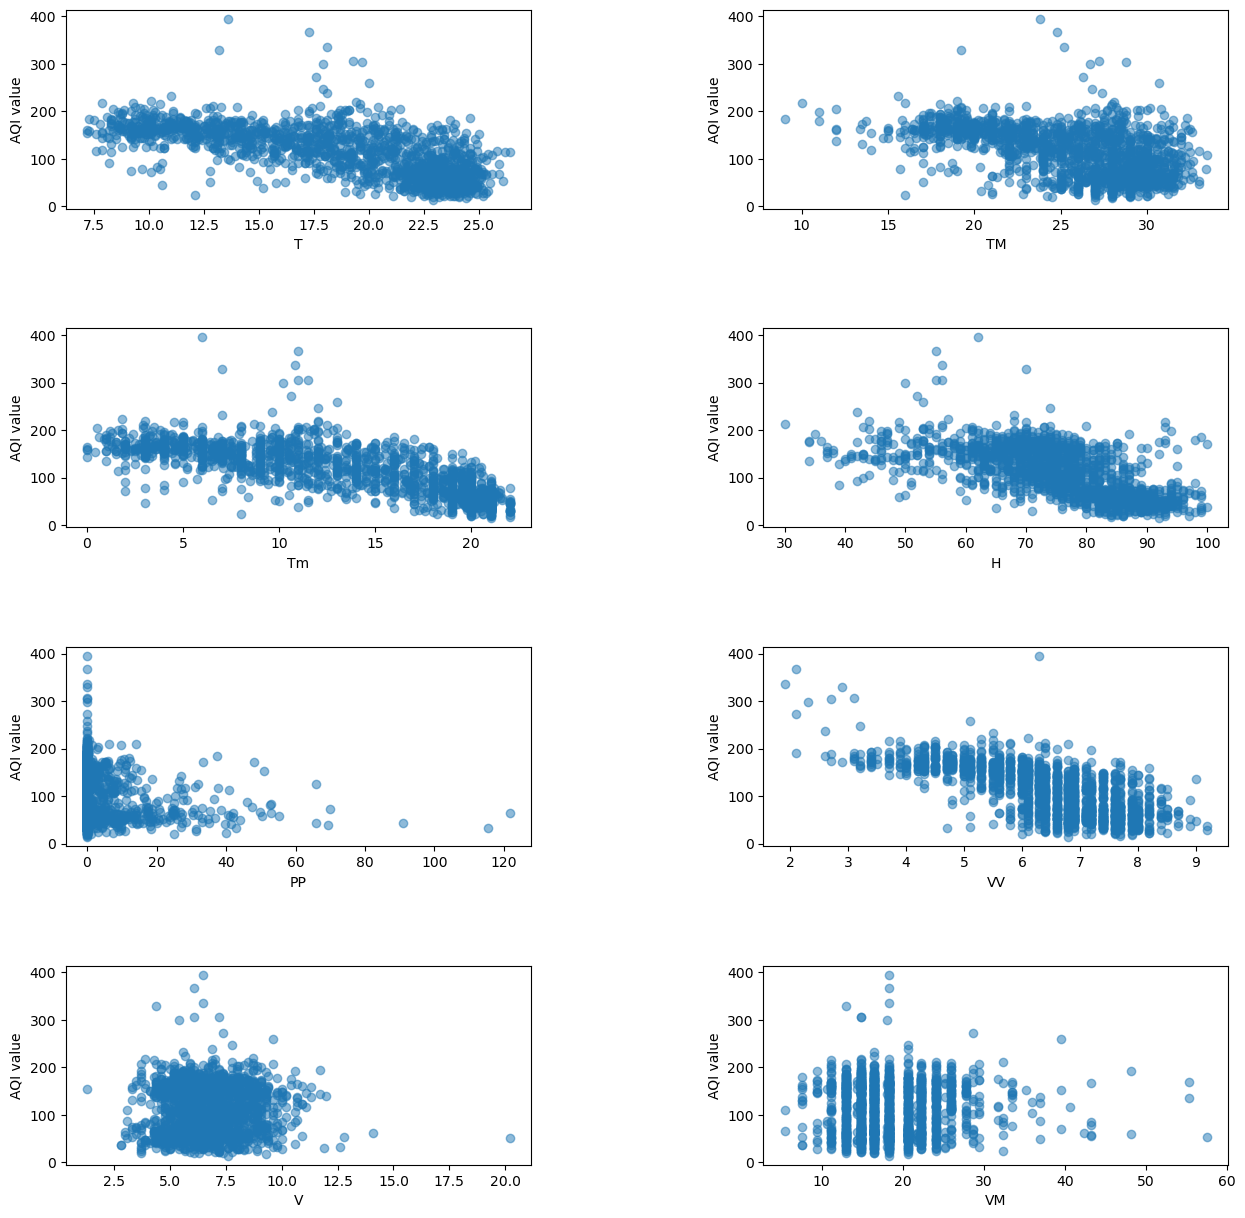

In [23]:
scatterplots(features, ncol=2, figsize=(15, 15));
plt.show()

* First three features `T`, `TM`, and `Tm` shows higher colinearity with the dependent variable. Also, these three variables shows similar trend on colinearity. We will check how they are related here. In addition, `Humidity` and `Visibility` also are midly corelated with dependent variable that is air quality index `AQI`. 

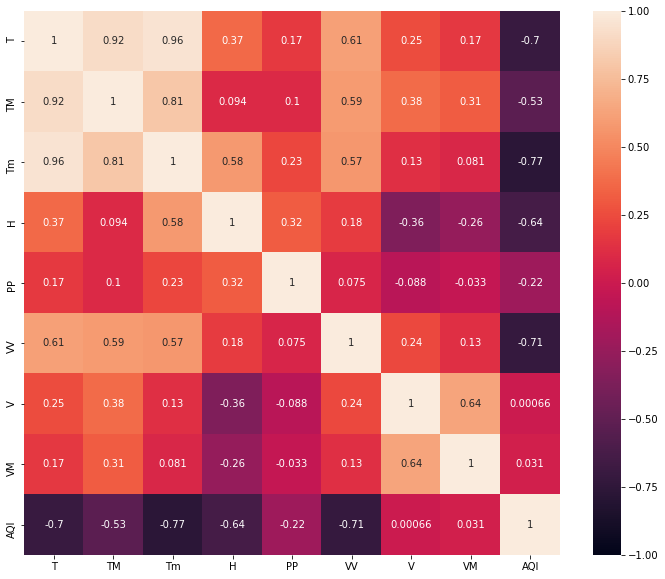

In [28]:
# check correlation with heat map
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True);

- Just like we expected, three temperature variables are highly correlated more than 80%. This is called multicollinearity where one independent variable related to one or more other independent variables. We should keep only one feature out of three temperature feature in this case. 

In [29]:
# dropping TM and Tm and keep T only
data.drop(columns=['TM','Tm'],axis=1,inplace=True)

## 3.6 Time Series Exploration on Data<a id='3.6_Time_Series'></a>

- Since this is time series analysis where we have air quality dependent with time of the year. Check this here.

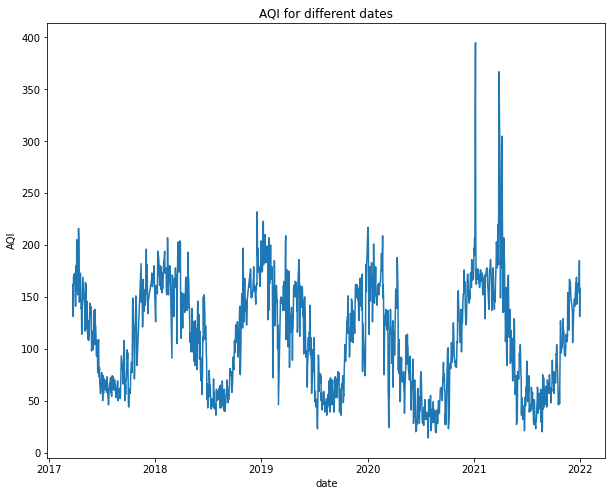

- We see sinusoidal behaviour for different period of year. In general, the `AQI` value is small during middle of the year and higher at the begging of the year. So we can get one or two features from the date to look on data further. 
- We can make two feature here, month and season. We will check colinearity with these two features and take highly correlated feature for out model.

## 3.6.1 Add Month to data<a id='3.6.1_Add_Month'></a>

- Use pandas `dt.month` instance from datetime function to get the month from the date.

In [33]:
# add month to data
data['month'] = data['date'].dt.month

In [35]:
# check first few data
# we see month from date is matching with the month variable in the data
data.head()

,date,T,H,PP,VV,V,VM,AQI,month
0,2017-03-24,17.6,72.0,0.00,5.1,10.4,25.9,162.0,3
1,2017-03-25,19.2,69.0,15.49,5.6,5.6,14.8,156.0,3
2,2017-03-26,19.4,75.0,0.00,4.8,10.0,24.1,131.0,3
3,2017-03-27,20.2,73.0,0.00,5.0,8.5,22.2,169.0,3
4,2017-03-28,19.9,79.0,0.00,4.0,5.6,14.8,162.0,3


- Create scatter plot of month with `AQI`. 

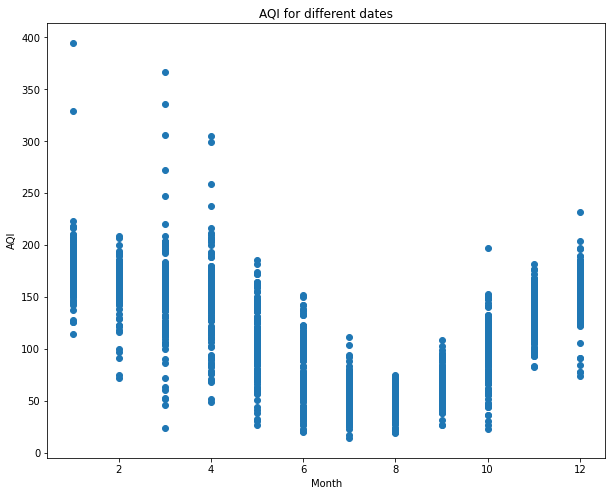

In [37]:
# AQI as the function of month
plt.figure(figsize=(10,8))
plt.scatter(data['month'],data['AQI'])
plt.title('AQI for different dates')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()

- The above scatter plot shows low values during month of 7,8 and 9. During 2,3 ie march and april, the air quality index has large variability. Next check the average values on each month. 

In [38]:
# air quality group by month
data.groupby(data['month'])['AQI'].mean()

month
1     176.216667
2     160.076190
3     153.724409
4     145.709459
5     109.250000
6      80.181208
7      53.496774
8      49.593548
9      63.534247
10     94.051948
11    135.786260
12    155.262774
Name: AQI, dtype: float64

- On average, month from June to September, air quality is within 100. Which is classified as moderate. But there are some days during month of January and March greater than 300. Those values are considered hazardous. It could be impossible to have those values, and may be those values are outlier. We will check outlier by creating box plots on the next sessions. Before that lets create another variable from the date known as season.

## 3.6.2 Add Season to data<a id='3.6.1_Add_Season'></a>

- Add season as another variable. So the season based on months are as follow
- Winder (1)- Months: 12, 1, 2
- Spring (2)- Months: 3,4,5
- Summer (3)- Months: 6,7,8
- Fall   (4)- Months: 9, 10,11

More information about seasons in nepal is given here https://uptohimalaya.com/seasons-in-nepal/

In [48]:
# map month to season
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
month_to_season

{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}

In [49]:
# create column of season
data['season'] = data['month'].map(month_to_season) 

In [50]:
# check few data
data.head()

,date,T,H,PP,VV,V,VM,AQI,month,season
0,2017-03-24,17.6,72.0,0.00,5.1,10.4,25.9,162.0,3,2
1,2017-03-25,19.2,69.0,15.49,5.6,5.6,14.8,156.0,3,2
2,2017-03-26,19.4,75.0,0.00,4.8,10.0,24.1,131.0,3,2
3,2017-03-27,20.2,73.0,0.00,5.0,8.5,22.2,169.0,3,2
4,2017-03-28,19.9,79.0,0.00,4.0,5.6,14.8,162.0,3,2


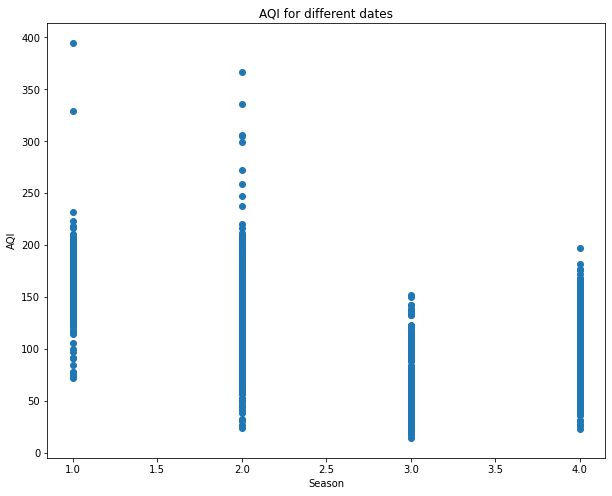

In [51]:
# AQI as the function of month
plt.figure(figsize=(10,8))
plt.scatter(data['season'],data['AQI'])
plt.title('AQI for different dates')
plt.xlabel('Season')
plt.ylabel('AQI')
plt.show()

In [53]:
# lets check correlation between months and season
data['month'].corr(data['season'])

0.56265971336646

- They are more than 50% correlated. So we will keep only one feature from `month` and `season` at the end. 

## 3.7 Finding Outliers<a id='3.7_Finding_Outliers'></a>

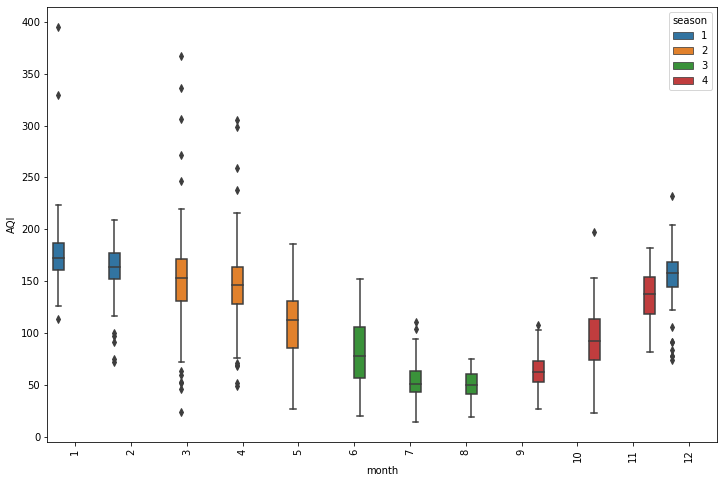

In [56]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='month', y='AQI',hue='season', data=data)
plt.xticks(rotation='vertical')
plt.ylabel('AQI')
plt.xlabel('month');

- There are few AQI values greate than 300, which are considered hazardous falls as outlier. These data are in the month of January and March. Other values, even those are outside inter-quartile range, we can consider those acceptable. But checking news we have few days AQI even higher than 400. So lets check the date whose AQI is higher than 300. 

In [58]:
data[data.AQI > 300]

,date,T,H,PP,VV,V,VM,AQI,month,season
1318,2021-01-05,13.2,70.0,0.0,2.9,4.4,13.0,329.0,1,1
1319,2021-01-06,13.6,62.0,0.0,6.3,6.5,18.3,395.0,1,1
1397,2021-03-28,17.3,55.0,0.0,2.1,6.1,18.3,367.0,3,2
1398,2021-03-29,18.1,56.0,0.0,1.9,6.5,18.3,336.0,3,2
1399,2021-03-30,19.3,56.0,0.0,3.1,7.2,14.8,306.0,3,2
1407,2021-04-07,19.7,55.0,0.0,2.7,6.1,14.8,305.0,4,2


- After exploring news we found these dates have really high AQI values. https://www.nepalitimes.com/latest/kathmandu-air-pollution-hits-record-high/ . So we will keep this data.

- I make normal check here of correlation between season and month with AQI. I will keep one feature which have high absolute correlation and remove other

In [61]:
# correlation coefficient between dependent and independent variable
data['AQI'].corr(data['season']) , data['AQI'].corr(data['month'])

(-0.5748845905198031, -0.3196188597672898)

- Drop Month from dataset and keep season only

In [62]:
data.drop(columns=['month'],axis=1,inplace=True)

## 3.8 Save Data<a id='3.8_Save_Data'></a>

- Set date as index and Save the data with index= True

In [63]:
data.set_index('date',inplace=True)

In [64]:
data.to_csv('../data/realdata/exploratory_air_quality.csv',index=True)